In [2]:
import multiprocessing
import itertools
import requests
import pandas as pd
from polygon import RESTClient
import pandas as pd
from polygonAPIkey import polygonAPIkey
from pandas_datareader import data as pdr
from tqdm.auto import tqdm
import multiprocessing as mp
import numpy as np
import yfinance as yf
import time
import pickle
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt

yf.pdr_override()

In [3]:
ticks = pd.read_csv('tickers.csv')
ticks

,ticker
0,EMB
1,DDS
2,EME
3,TQQQ
4,CRNT
...,...
2009,OEF
2010,ATUS
2011,MAR
2012,RPV


In [9]:
from tqdm.auto import tqdm

df = pd.DataFrame(columns=['ticker', 'return'])

for tick in tqdm(ticks['ticker']):
    data = pdr.get_data_yahoo(tick)[['Adj Close', 'Volume']]
    data['ret'] = data['Adj Close'].pct_change()
    
    for i in range(10, len(data) - 1):
        historial_avg_volume = data['Volume'][i-20:i].mean()
        historical_avg_price_change = data['ret'].abs()[i-20:i].mean()
        
        today_volume = data['Volume'][i]
        today_price_change = data['ret'].abs()[i]
        tmr_price_change = data['ret'][i+1]
        
        if today_volume < 4000000 or data['Adj Close'][i] < 5:
            continue
        if today_volume > historial_avg_volume*4 and today_price_change < historical_avg_price_change*2:
            df = df.append({'ticker': tick, 'return': tmr_price_change}, ignore_index=True)
            
df.to_csv('volume_burst.csv', index=False)
    

  0%|          | 0/2014 [00:00<?, ?it/s]

[*********************100%%**********************]  1 of 1 completed


  0%|          | 1/2014 [00:01<42:38,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


  0%|          | 2/2014 [00:04<1:15:10,  2.24s/it]

[*********************100%%**********************]  1 of 1 completed


  0%|          | 3/2014 [00:06<1:10:09,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


  0%|          | 4/2014 [00:07<56:55,  1.70s/it]  

[*********************100%%**********************]  1 of 1 completed


  0%|          | 5/2014 [00:08<54:45,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


  0%|          | 6/2014 [00:11<1:09:27,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


  0%|          | 7/2014 [00:12<55:56,  1.67s/it]  

[*********************100%%**********************]  1 of 1 completed


  0%|          | 8/2014 [00:15<1:14:18,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


  0%|          | 9/2014 [00:17<1:06:56,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


  0%|          | 10/2014 [00:19<1:03:17,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 11/2014 [00:20<54:49,  1.64s/it]  

[*********************100%%**********************]  1 of 1 completed


  1%|          | 12/2014 [00:21<50:23,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 13/2014 [00:22<49:06,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 14/2014 [00:23<39:25,  1.18s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 15/2014 [00:24<39:41,  1.19s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 16/2014 [00:26<44:38,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 17/2014 [00:26<38:56,  1.17s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 18/2014 [00:30<58:02,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 19/2014 [00:31<54:58,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 20/2014 [00:34<1:06:31,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 21/2014 [00:36<1:12:16,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 22/2014 [00:37<55:51,  1.68s/it]  

[*********************100%%**********************]  1 of 1 completed


  1%|          | 23/2014 [00:39<1:00:58,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 24/2014 [00:42<1:13:58,  2.23s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|          | 25/2014 [00:44<1:07:31,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|▏         | 26/2014 [00:48<1:30:43,  2.74s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|▏         | 27/2014 [00:50<1:16:48,  2.32s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|▏         | 28/2014 [00:51<1:12:43,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|▏         | 29/2014 [00:53<1:06:02,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


  1%|▏         | 30/2014 [00:53<51:16,  1.55s/it]  

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 31/2014 [00:56<58:53,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 32/2014 [00:59<1:13:21,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 33/2014 [01:02<1:22:09,  2.49s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 34/2014 [01:04<1:11:15,  2.16s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 35/2014 [01:05<1:06:50,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 36/2014 [01:08<1:18:04,  2.37s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 37/2014 [01:10<1:11:08,  2.16s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 38/2014 [01:13<1:21:09,  2.46s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 39/2014 [01:18<1:39:39,  3.03s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 40/2014 [01:19<1:22:40,  2.51s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 41/2014 [01:21<1:14:22,  2.26s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 42/2014 [01:22<1:04:33,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 43/2014 [01:22<50:16,  1.53s/it]  

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 44/2014 [01:27<1:18:26,  2.39s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 45/2014 [01:28<1:10:42,  2.15s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 46/2014 [01:30<1:03:11,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 47/2014 [01:31<51:21,  1.57s/it]  

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 48/2014 [01:31<42:25,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 49/2014 [01:32<41:50,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


  2%|▏         | 50/2014 [01:34<44:41,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 51/2014 [01:35<40:14,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 52/2014 [01:36<43:15,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 53/2014 [01:39<1:00:19,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 54/2014 [01:41<53:15,  1.63s/it]  

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 55/2014 [01:42<54:58,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 56/2014 [01:44<57:15,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 57/2014 [01:47<1:03:20,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 58/2014 [01:50<1:19:35,  2.44s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 59/2014 [01:52<1:11:43,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 60/2014 [01:53<1:02:56,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 61/2014 [01:56<1:14:20,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 62/2014 [01:59<1:18:30,  2.41s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 63/2014 [02:01<1:11:22,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 64/2014 [02:02<1:01:04,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 65/2014 [02:03<54:56,  1.69s/it]  

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 66/2014 [02:06<1:03:52,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 67/2014 [02:09<1:18:55,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 68/2014 [02:11<1:14:30,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 69/2014 [02:12<1:00:15,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


  3%|▎         | 70/2014 [02:13<51:40,  1.59s/it]  

[*********************100%%**********************]  1 of 1 completed


  4%|▎         | 71/2014 [02:15<54:14,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▎         | 72/2014 [02:17<56:52,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▎         | 73/2014 [02:19<1:03:06,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▎         | 74/2014 [02:22<1:08:55,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▎         | 75/2014 [02:24<1:05:21,  2.02s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 76/2014 [02:25<59:19,  1.84s/it]  

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 77/2014 [02:28<1:06:54,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 78/2014 [02:31<1:21:33,  2.53s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 79/2014 [02:32<1:07:33,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 80/2014 [02:34<1:00:14,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 81/2014 [02:35<58:30,  1.82s/it]  

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 82/2014 [02:37<57:17,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 83/2014 [02:39<1:00:12,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 84/2014 [02:40<50:14,  1.56s/it]  

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 85/2014 [02:41<43:55,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 86/2014 [02:45<1:13:45,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 87/2014 [02:46<59:46,  1.86s/it]  

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 88/2014 [02:47<51:32,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 89/2014 [02:48<43:56,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


  4%|▍         | 90/2014 [02:49<41:45,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 91/2014 [02:51<47:25,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 92/2014 [02:53<49:43,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 93/2014 [02:54<47:30,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 94/2014 [02:55<41:35,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 95/2014 [02:56<40:55,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 96/2014 [02:57<36:02,  1.13s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 97/2014 [02:58<36:39,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 98/2014 [03:00<44:27,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 99/2014 [03:01<38:25,  1.20s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▍         | 100/2014 [03:03<47:28,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 101/2014 [03:04<45:55,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 102/2014 [03:08<1:05:25,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 103/2014 [03:12<1:21:19,  2.55s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 104/2014 [03:12<1:04:28,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 105/2014 [03:13<53:06,  1.67s/it]  

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 106/2014 [03:14<43:23,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 107/2014 [03:15<43:30,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 108/2014 [03:18<54:53,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 109/2014 [03:21<1:07:54,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


  5%|▌         | 110/2014 [03:22<59:29,  1.87s/it]  

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 111/2014 [03:23<49:48,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 112/2014 [03:26<1:00:41,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 113/2014 [03:28<1:04:57,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 114/2014 [03:29<52:21,  1.65s/it]  

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 115/2014 [03:31<53:16,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 116/2014 [03:34<1:07:14,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 117/2014 [03:36<1:08:28,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 118/2014 [03:37<56:12,  1.78s/it]  

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 119/2014 [03:40<1:11:19,  2.26s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 120/2014 [03:43<1:19:35,  2.52s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 121/2014 [03:45<1:11:54,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 122/2014 [03:49<1:22:38,  2.62s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 123/2014 [03:49<1:02:50,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 124/2014 [03:51<1:03:23,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▌         | 125/2014 [03:52<52:59,  1.68s/it]  

[*********************100%%**********************]  1 of 1 completed


  6%|▋         | 126/2014 [03:53<44:17,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▋         | 127/2014 [03:53<36:44,  1.17s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▋         | 128/2014 [03:55<38:15,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▋         | 129/2014 [03:58<59:22,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


  6%|▋         | 130/2014 [04:00<56:56,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 131/2014 [04:01<53:07,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 132/2014 [04:03<51:15,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 133/2014 [04:04<44:11,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 134/2014 [04:05<47:29,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 135/2014 [04:07<50:22,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 136/2014 [04:12<1:18:43,  2.52s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 137/2014 [04:14<1:14:58,  2.40s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 138/2014 [04:15<58:19,  1.87s/it]  

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 139/2014 [04:16<56:39,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 140/2014 [04:17<47:37,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 141/2014 [04:18<40:46,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 142/2014 [04:19<42:30,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 143/2014 [04:22<50:36,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 144/2014 [04:24<58:23,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 145/2014 [04:25<51:12,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 146/2014 [04:28<58:29,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 147/2014 [04:29<57:28,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 148/2014 [04:32<1:05:53,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 149/2014 [04:34<1:06:05,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 150/2014 [04:35<50:36,  1.63s/it]  

[*********************100%%**********************]  1 of 1 completed


  7%|▋         | 151/2014 [04:37<56:14,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 152/2014 [04:39<57:43,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 153/2014 [04:40<48:11,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 154/2014 [04:42<54:34,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 155/2014 [04:44<52:56,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 156/2014 [04:44<42:02,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 157/2014 [04:48<1:02:25,  2.02s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 158/2014 [04:49<54:56,  1.78s/it]  

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 159/2014 [04:50<48:11,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 160/2014 [04:51<41:31,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 161/2014 [04:53<45:08,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 162/2014 [04:53<37:29,  1.21s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 163/2014 [04:55<45:24,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 164/2014 [04:58<58:13,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 165/2014 [04:59<50:48,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 166/2014 [05:00<43:10,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 167/2014 [05:04<1:05:32,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 168/2014 [05:05<55:55,  1.82s/it]  

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 169/2014 [05:07<57:31,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 170/2014 [05:08<48:48,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


  8%|▊         | 171/2014 [05:09<45:06,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▊         | 172/2014 [05:10<40:10,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▊         | 173/2014 [05:12<41:15,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▊         | 174/2014 [05:13<37:55,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▊         | 175/2014 [05:14<38:54,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▊         | 176/2014 [05:17<55:07,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 177/2014 [05:20<1:09:12,  2.26s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 178/2014 [05:21<1:00:00,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 179/2014 [05:22<47:31,  1.55s/it]  

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 180/2014 [05:24<49:58,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 181/2014 [05:25<48:06,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 182/2014 [05:27<47:06,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 183/2014 [05:28<40:44,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 184/2014 [05:28<35:46,  1.17s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 185/2014 [05:29<32:54,  1.08s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 186/2014 [05:30<32:33,  1.07s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 187/2014 [05:32<34:31,  1.13s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 188/2014 [05:35<51:09,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 189/2014 [05:38<1:02:13,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 190/2014 [05:42<1:22:20,  2.71s/it]

[*********************100%%**********************]  1 of 1 completed


  9%|▉         | 191/2014 [05:44<1:21:38,  2.69s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 192/2014 [05:45<1:05:05,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 193/2014 [05:48<1:09:09,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 194/2014 [05:49<1:02:57,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 195/2014 [05:52<1:11:03,  2.34s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 196/2014 [05:55<1:09:25,  2.29s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 197/2014 [05:57<1:08:56,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 198/2014 [05:59<1:03:12,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 199/2014 [05:59<52:19,  1.73s/it]  

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 200/2014 [06:01<52:58,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|▉         | 201/2014 [06:02<44:49,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 202/2014 [06:03<39:32,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 203/2014 [06:04<39:13,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 204/2014 [06:06<42:53,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 205/2014 [06:08<46:48,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 206/2014 [06:10<49:28,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 207/2014 [06:11<45:49,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 208/2014 [06:13<54:38,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 209/2014 [06:16<1:00:29,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 210/2014 [06:16<47:09,  1.57s/it]  

[*********************100%%**********************]  1 of 1 completed


 10%|█         | 211/2014 [06:18<50:28,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 212/2014 [06:20<47:49,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 213/2014 [06:24<1:10:09,  2.34s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 214/2014 [06:25<58:55,  1.96s/it]  

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 215/2014 [06:26<48:40,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 216/2014 [06:27<42:36,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 217/2014 [06:28<43:53,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 218/2014 [06:30<42:15,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 219/2014 [06:31<44:21,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 220/2014 [06:32<37:11,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 221/2014 [06:35<51:39,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 222/2014 [06:39<1:11:40,  2.40s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 223/2014 [06:41<1:08:24,  2.29s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 224/2014 [06:42<56:59,  1.91s/it]  

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 225/2014 [06:43<47:32,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█         | 226/2014 [06:44<43:40,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█▏        | 227/2014 [06:45<42:39,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█▏        | 228/2014 [06:47<49:29,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█▏        | 229/2014 [06:49<49:52,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█▏        | 230/2014 [06:50<43:59,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 11%|█▏        | 231/2014 [06:51<41:08,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 232/2014 [06:53<45:23,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 233/2014 [06:54<37:49,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 234/2014 [06:56<47:49,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 235/2014 [06:57<43:25,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 236/2014 [06:59<46:36,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 237/2014 [07:01<50:31,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 238/2014 [07:02<44:00,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 239/2014 [07:04<47:17,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 240/2014 [07:06<47:56,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 241/2014 [07:07<48:01,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 242/2014 [07:08<43:34,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 243/2014 [07:09<37:05,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 244/2014 [07:10<34:08,  1.16s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 245/2014 [07:11<35:16,  1.20s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 246/2014 [07:14<45:02,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 247/2014 [07:15<39:20,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 248/2014 [07:15<35:47,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 249/2014 [07:18<46:01,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 250/2014 [07:20<47:59,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 12%|█▏        | 251/2014 [07:21<44:31,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 252/2014 [07:23<48:44,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 253/2014 [07:25<50:42,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 254/2014 [07:27<52:08,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 255/2014 [07:28<46:00,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 256/2014 [07:31<1:04:38,  2.21s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 257/2014 [07:33<1:02:37,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 258/2014 [07:36<1:03:44,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 259/2014 [07:37<56:05,  1.92s/it]  

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 260/2014 [07:38<46:06,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 261/2014 [07:38<38:29,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 262/2014 [07:42<54:18,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 263/2014 [07:42<42:35,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 264/2014 [07:45<58:39,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 265/2014 [07:48<59:10,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 266/2014 [07:49<51:15,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 267/2014 [07:49<40:21,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 268/2014 [07:50<37:34,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 269/2014 [07:53<48:28,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 270/2014 [07:55<54:55,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 13%|█▎        | 271/2014 [07:56<45:28,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▎        | 272/2014 [07:59<55:10,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▎        | 273/2014 [08:01<57:17,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▎        | 274/2014 [08:04<1:04:34,  2.23s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▎        | 275/2014 [08:06<1:05:16,  2.25s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▎        | 276/2014 [08:07<53:09,  1.83s/it]  

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 277/2014 [08:09<56:10,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 278/2014 [08:10<48:27,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 279/2014 [08:13<1:01:00,  2.11s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 280/2014 [08:14<47:23,  1.64s/it]  

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 281/2014 [08:15<47:32,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 282/2014 [08:16<40:20,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 283/2014 [08:19<52:06,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 284/2014 [08:21<52:42,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 285/2014 [08:21<41:51,  1.45s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 286/2014 [08:22<35:24,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 287/2014 [08:23<32:56,  1.14s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 288/2014 [08:25<40:33,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 289/2014 [08:26<35:44,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 290/2014 [08:28<44:21,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 291/2014 [08:29<37:08,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 14%|█▍        | 292/2014 [08:31<45:21,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 293/2014 [08:33<44:40,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 294/2014 [08:36<58:30,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 295/2014 [08:38<57:03,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 296/2014 [08:39<47:47,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 297/2014 [08:42<1:00:13,  2.10s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 298/2014 [08:43<50:26,  1.76s/it]  

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 299/2014 [08:45<53:47,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 300/2014 [08:48<1:04:49,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 301/2014 [08:52<1:19:07,  2.77s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▍        | 302/2014 [08:55<1:21:17,  2.85s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 303/2014 [08:57<1:15:42,  2.65s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 304/2014 [09:00<1:16:39,  2.69s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 305/2014 [09:01<1:01:37,  2.16s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 306/2014 [09:02<51:27,  1.81s/it]  

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 307/2014 [09:04<50:55,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 308/2014 [09:05<48:01,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 309/2014 [09:08<56:37,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 310/2014 [09:10<56:26,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 311/2014 [09:11<51:51,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 15%|█▌        | 312/2014 [09:14<1:01:42,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 313/2014 [09:15<53:07,  1.87s/it]  

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 314/2014 [09:17<47:34,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 315/2014 [09:18<42:58,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 316/2014 [09:19<39:03,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 317/2014 [09:20<34:18,  1.21s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 318/2014 [09:21<34:23,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 319/2014 [09:23<38:51,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 320/2014 [09:23<31:29,  1.12s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 321/2014 [09:26<47:45,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 322/2014 [09:28<46:00,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 323/2014 [09:28<36:25,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 324/2014 [09:29<34:18,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 325/2014 [09:31<40:06,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 326/2014 [09:32<38:28,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▌        | 327/2014 [09:34<40:47,  1.45s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▋        | 328/2014 [09:36<47:09,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▋        | 329/2014 [09:38<49:08,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▋        | 330/2014 [09:41<57:11,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▋        | 331/2014 [09:43<59:44,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 16%|█▋        | 332/2014 [09:44<46:51,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 333/2014 [09:45<39:11,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 334/2014 [09:46<38:02,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 335/2014 [09:48<43:33,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 336/2014 [09:49<37:20,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 337/2014 [09:50<37:26,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 338/2014 [09:51<35:43,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 339/2014 [09:53<41:05,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 340/2014 [09:55<42:39,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 341/2014 [09:57<48:34,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 342/2014 [09:58<40:50,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 343/2014 [09:58<34:07,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 344/2014 [10:02<56:55,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 345/2014 [10:04<50:43,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 346/2014 [10:05<45:04,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 347/2014 [10:07<53:28,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 348/2014 [10:10<59:27,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 349/2014 [10:11<50:43,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 350/2014 [10:13<52:55,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 351/2014 [10:15<47:38,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 17%|█▋        | 352/2014 [10:17<49:46,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 353/2014 [10:18<50:28,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 354/2014 [10:20<48:02,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 355/2014 [10:23<57:24,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 356/2014 [10:24<46:01,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 357/2014 [10:25<42:11,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 358/2014 [10:26<43:46,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 359/2014 [10:28<39:15,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 360/2014 [10:28<33:20,  1.21s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 361/2014 [10:29<28:16,  1.03s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 362/2014 [10:32<44:29,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 363/2014 [10:34<49:01,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 364/2014 [10:35<45:33,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 365/2014 [10:36<38:27,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 366/2014 [10:37<33:18,  1.21s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 367/2014 [10:38<29:56,  1.09s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 368/2014 [10:39<32:20,  1.18s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 369/2014 [10:40<27:35,  1.01s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 370/2014 [10:43<43:58,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 371/2014 [10:46<1:00:12,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 18%|█▊        | 372/2014 [10:49<1:03:08,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▊        | 373/2014 [10:52<1:09:09,  2.53s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▊        | 374/2014 [10:53<53:16,  1.95s/it]  

[*********************100%%**********************]  1 of 1 completed


 19%|█▊        | 375/2014 [10:54<48:11,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▊        | 376/2014 [10:56<50:08,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▊        | 377/2014 [10:59<1:03:26,  2.33s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 378/2014 [11:02<1:09:39,  2.55s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 379/2014 [11:04<1:02:59,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 380/2014 [11:05<49:08,  1.80s/it]  

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 381/2014 [11:07<53:31,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 382/2014 [11:09<50:41,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 383/2014 [11:11<52:51,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 384/2014 [11:12<42:29,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 385/2014 [11:13<37:44,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 386/2014 [11:16<50:57,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 387/2014 [11:17<50:53,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 388/2014 [11:18<41:52,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 389/2014 [11:22<57:51,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 390/2014 [11:23<54:27,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 391/2014 [11:25<48:46,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 19%|█▉        | 392/2014 [11:26<47:53,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 393/2014 [11:29<57:44,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 394/2014 [11:30<45:18,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 395/2014 [11:31<42:27,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 396/2014 [11:33<40:47,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 397/2014 [11:34<35:38,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 398/2014 [11:35<33:09,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 399/2014 [11:36<35:47,  1.33s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 400/2014 [11:37<32:49,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 401/2014 [11:40<43:42,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|█▉        | 402/2014 [11:41<37:01,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 403/2014 [11:42<40:23,  1.50s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 404/2014 [11:43<35:07,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 405/2014 [11:44<33:42,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 406/2014 [11:45<28:33,  1.07s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 407/2014 [11:47<33:39,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 408/2014 [11:48<37:26,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 409/2014 [11:50<41:06,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 410/2014 [11:52<43:51,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 411/2014 [11:53<37:35,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 20%|██        | 412/2014 [11:55<42:44,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 413/2014 [11:57<45:43,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 414/2014 [11:58<41:48,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 415/2014 [12:00<45:48,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 416/2014 [12:02<48:45,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 417/2014 [12:04<48:57,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 418/2014 [12:07<56:31,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 419/2014 [12:08<44:04,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 420/2014 [12:08<34:46,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 421/2014 [12:09<33:46,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 422/2014 [12:10<31:12,  1.18s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 423/2014 [12:12<34:19,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 424/2014 [12:15<48:43,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 425/2014 [12:17<50:00,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 426/2014 [12:21<1:09:04,  2.61s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██        | 427/2014 [12:24<1:12:06,  2.73s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██▏       | 428/2014 [12:26<1:00:30,  2.29s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██▏       | 429/2014 [12:27<55:58,  2.12s/it]  

[*********************100%%**********************]  1 of 1 completed


 21%|██▏       | 430/2014 [12:29<52:40,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██▏       | 431/2014 [12:31<51:18,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██▏       | 432/2014 [12:31<41:09,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 21%|██▏       | 433/2014 [12:32<37:02,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 434/2014 [12:33<33:37,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 435/2014 [12:35<34:42,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 436/2014 [12:37<39:42,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 437/2014 [12:39<41:58,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 438/2014 [12:40<38:17,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 439/2014 [12:41<34:54,  1.33s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 440/2014 [12:44<50:44,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 441/2014 [12:46<46:22,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 442/2014 [12:47<42:17,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 443/2014 [12:48<36:16,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 444/2014 [12:49<32:39,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 445/2014 [12:51<44:33,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 446/2014 [12:53<45:49,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 447/2014 [12:54<36:43,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 448/2014 [12:55<34:02,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 449/2014 [12:57<38:46,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 450/2014 [12:59<43:01,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 451/2014 [12:59<35:08,  1.35s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 452/2014 [13:00<30:06,  1.16s/it]

[*********************100%%**********************]  1 of 1 completed


 22%|██▏       | 453/2014 [13:02<36:51,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 454/2014 [13:05<49:43,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 455/2014 [13:07<47:39,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 456/2014 [13:08<39:23,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 457/2014 [13:09<37:29,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 458/2014 [13:12<47:46,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 459/2014 [13:15<55:10,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 460/2014 [13:17<59:18,  2.29s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 461/2014 [13:18<49:44,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 462/2014 [13:19<44:14,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 463/2014 [13:21<45:20,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 464/2014 [13:22<37:36,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 465/2014 [13:23<34:09,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 466/2014 [13:24<32:02,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 467/2014 [13:26<40:05,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 468/2014 [13:27<32:39,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 469/2014 [13:28<29:30,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 470/2014 [13:29<30:58,  1.20s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 471/2014 [13:31<32:36,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 472/2014 [13:33<38:05,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 23%|██▎       | 473/2014 [13:35<48:22,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▎       | 474/2014 [13:38<57:02,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▎       | 475/2014 [13:39<44:15,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▎       | 476/2014 [13:41<47:10,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▎       | 477/2014 [13:45<1:00:04,  2.35s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▎       | 478/2014 [13:45<46:15,  1.81s/it]  

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 479/2014 [13:46<42:00,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 480/2014 [13:49<49:44,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 481/2014 [13:51<48:54,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 482/2014 [13:52<39:10,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 483/2014 [13:55<52:49,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 484/2014 [13:56<41:21,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 485/2014 [13:57<40:45,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 486/2014 [13:59<45:19,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 487/2014 [14:02<51:52,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 488/2014 [14:03<42:14,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 489/2014 [14:04<37:06,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 490/2014 [14:04<31:00,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 491/2014 [14:05<29:32,  1.16s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 492/2014 [14:07<32:25,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


 24%|██▍       | 493/2014 [14:08<30:21,  1.20s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 494/2014 [14:11<48:08,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 495/2014 [14:12<37:32,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 496/2014 [14:14<44:07,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 497/2014 [14:19<1:03:23,  2.51s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 498/2014 [14:20<51:42,  2.05s/it]  

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 499/2014 [14:20<43:05,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 500/2014 [14:23<47:26,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 501/2014 [14:25<51:07,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 502/2014 [14:26<42:33,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▍       | 503/2014 [14:28<43:53,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 504/2014 [14:29<36:42,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 505/2014 [14:31<39:39,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 506/2014 [14:34<57:02,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 507/2014 [14:37<56:09,  2.24s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 508/2014 [14:37<44:00,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 509/2014 [14:38<36:52,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 510/2014 [14:39<31:49,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 511/2014 [14:41<35:53,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 512/2014 [14:43<42:18,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 25%|██▌       | 513/2014 [14:44<36:58,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 514/2014 [14:45<36:30,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 515/2014 [14:47<38:12,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 516/2014 [14:49<44:14,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 517/2014 [14:53<59:14,  2.37s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 518/2014 [14:56<1:03:32,  2.55s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 519/2014 [14:57<50:40,  2.03s/it]  

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 520/2014 [14:58<45:20,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 521/2014 [15:00<45:18,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 522/2014 [15:03<51:33,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 523/2014 [15:04<47:22,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 524/2014 [15:05<38:04,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 525/2014 [15:06<31:03,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 526/2014 [15:06<26:04,  1.05s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 527/2014 [15:08<34:39,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▌       | 528/2014 [15:11<47:17,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▋       | 529/2014 [15:13<42:18,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▋       | 530/2014 [15:15<46:13,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▋       | 531/2014 [15:16<40:40,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▋       | 532/2014 [15:17<36:17,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 26%|██▋       | 533/2014 [15:18<31:50,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 534/2014 [15:19<28:36,  1.16s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 535/2014 [15:20<31:12,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 536/2014 [15:23<40:54,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 537/2014 [15:27<55:55,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 538/2014 [15:28<52:04,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 539/2014 [15:30<47:18,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 540/2014 [15:32<46:41,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 541/2014 [15:33<42:16,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 542/2014 [15:34<33:38,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 543/2014 [15:36<41:24,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 544/2014 [15:37<35:49,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 545/2014 [15:40<48:22,  1.98s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 546/2014 [15:41<38:40,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 547/2014 [15:44<54:19,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 548/2014 [15:47<53:46,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 549/2014 [15:48<47:32,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 550/2014 [15:50<47:45,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 551/2014 [15:52<49:13,  2.02s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 552/2014 [15:55<58:34,  2.40s/it]

[*********************100%%**********************]  1 of 1 completed


 27%|██▋       | 553/2014 [15:57<50:22,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 554/2014 [16:01<1:07:21,  2.77s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 555/2014 [16:06<1:21:01,  3.33s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 556/2014 [16:07<1:06:55,  2.75s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 557/2014 [16:09<1:00:47,  2.50s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 558/2014 [16:11<54:11,  2.23s/it]  

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 559/2014 [16:15<1:11:46,  2.96s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 560/2014 [16:18<1:07:19,  2.78s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 561/2014 [16:19<55:26,  2.29s/it]  

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 562/2014 [16:20<49:02,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 563/2014 [16:21<38:36,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 564/2014 [16:23<41:21,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 565/2014 [16:24<34:11,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 566/2014 [16:25<32:13,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 567/2014 [16:28<44:14,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 568/2014 [16:30<44:50,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 569/2014 [16:33<54:15,  2.25s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 570/2014 [16:37<1:05:06,  2.71s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 571/2014 [16:40<1:08:07,  2.83s/it]

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 572/2014 [16:40<53:16,  2.22s/it]  

[*********************100%%**********************]  1 of 1 completed


 28%|██▊       | 573/2014 [16:42<46:55,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▊       | 574/2014 [16:46<1:01:49,  2.58s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▊       | 575/2014 [16:49<1:06:31,  2.77s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▊       | 576/2014 [16:53<1:13:41,  3.08s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▊       | 577/2014 [16:56<1:11:39,  2.99s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▊       | 578/2014 [16:57<1:00:47,  2.54s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▊       | 579/2014 [16:58<50:31,  2.11s/it]  

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 580/2014 [16:59<43:53,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 581/2014 [17:00<37:26,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 582/2014 [17:01<33:33,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 583/2014 [17:02<31:24,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 584/2014 [17:05<38:55,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 585/2014 [17:08<48:25,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 586/2014 [17:11<57:42,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 587/2014 [17:12<48:36,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 588/2014 [17:14<43:12,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 589/2014 [17:14<34:39,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 590/2014 [17:18<50:22,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 591/2014 [17:18<39:11,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 592/2014 [17:19<33:44,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 593/2014 [17:23<47:04,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 29%|██▉       | 594/2014 [17:24<42:49,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 595/2014 [17:27<53:44,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 596/2014 [17:29<46:33,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 597/2014 [17:31<45:42,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 598/2014 [17:34<54:30,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 599/2014 [17:34<42:10,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 600/2014 [17:37<52:07,  2.21s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 601/2014 [17:38<40:57,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 602/2014 [17:41<47:47,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 603/2014 [17:42<39:45,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|██▉       | 604/2014 [17:43<37:18,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 605/2014 [17:46<49:03,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 606/2014 [17:50<57:00,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 607/2014 [17:53<1:01:52,  2.64s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 608/2014 [17:54<52:25,  2.24s/it]  

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 609/2014 [17:56<47:54,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 610/2014 [17:57<41:32,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 611/2014 [17:59<45:43,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 612/2014 [18:01<46:32,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 613/2014 [18:02<36:37,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 30%|███       | 614/2014 [18:04<40:36,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 615/2014 [18:06<43:54,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 616/2014 [18:08<40:36,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 617/2014 [18:11<50:52,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 618/2014 [18:12<44:58,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 619/2014 [18:13<38:31,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 620/2014 [18:14<34:58,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 621/2014 [18:16<33:10,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 622/2014 [18:17<33:23,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 623/2014 [18:19<35:34,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 624/2014 [18:20<31:03,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 625/2014 [18:20<27:08,  1.17s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 626/2014 [18:22<29:24,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 627/2014 [18:24<33:08,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 628/2014 [18:25<33:57,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███       | 629/2014 [18:27<33:10,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███▏      | 630/2014 [18:29<37:11,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███▏      | 631/2014 [18:29<30:55,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███▏      | 632/2014 [18:30<26:36,  1.16s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███▏      | 633/2014 [18:32<31:29,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 31%|███▏      | 634/2014 [18:33<29:20,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 635/2014 [18:34<30:20,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 636/2014 [18:37<42:10,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 637/2014 [18:38<35:14,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 638/2014 [18:41<44:42,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 639/2014 [18:44<47:07,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 640/2014 [18:47<54:47,  2.39s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 641/2014 [18:49<57:04,  2.49s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 642/2014 [18:51<48:10,  2.11s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 643/2014 [18:53<46:41,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 644/2014 [18:53<36:56,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 645/2014 [18:56<47:00,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 646/2014 [18:59<51:43,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 647/2014 [19:01<48:13,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 648/2014 [19:01<38:44,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 649/2014 [19:04<42:52,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 650/2014 [19:06<41:42,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 651/2014 [19:07<40:40,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 652/2014 [19:10<44:26,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 653/2014 [19:11<39:01,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 32%|███▏      | 654/2014 [19:14<52:10,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 655/2014 [19:16<49:31,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 656/2014 [19:19<55:39,  2.46s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 657/2014 [19:21<50:23,  2.23s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 658/2014 [19:22<39:13,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 659/2014 [19:23<34:56,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 660/2014 [19:25<40:12,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 661/2014 [19:29<54:00,  2.39s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 662/2014 [19:32<59:28,  2.64s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 663/2014 [19:34<53:48,  2.39s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 664/2014 [19:35<44:13,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 665/2014 [19:36<41:29,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 666/2014 [19:39<47:47,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 667/2014 [19:42<52:43,  2.35s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 668/2014 [19:46<1:02:12,  2.77s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 669/2014 [19:47<49:42,  2.22s/it]  

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 670/2014 [19:49<51:05,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 671/2014 [19:51<44:58,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 672/2014 [19:52<43:27,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 673/2014 [19:56<51:41,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 33%|███▎      | 674/2014 [19:59<57:39,  2.58s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▎      | 675/2014 [20:00<45:12,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▎      | 676/2014 [20:01<40:03,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▎      | 677/2014 [20:02<34:27,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▎      | 678/2014 [20:02<27:45,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▎      | 679/2014 [20:04<30:12,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 680/2014 [20:07<38:45,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 681/2014 [20:11<57:39,  2.60s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 682/2014 [20:13<54:08,  2.44s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 683/2014 [20:15<47:52,  2.16s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 684/2014 [20:15<37:29,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 685/2014 [20:17<40:03,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 686/2014 [20:19<37:02,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 687/2014 [20:21<38:01,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 688/2014 [20:24<48:30,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 689/2014 [20:26<46:10,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 690/2014 [20:27<41:32,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 691/2014 [20:28<32:52,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 692/2014 [20:31<44:23,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 693/2014 [20:32<35:35,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 34%|███▍      | 694/2014 [20:33<30:37,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 695/2014 [20:33<26:47,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 696/2014 [20:34<26:14,  1.19s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 697/2014 [20:38<41:23,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 698/2014 [20:41<50:35,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 699/2014 [20:43<44:34,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 700/2014 [20:43<36:19,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 701/2014 [20:45<35:58,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 702/2014 [20:49<53:33,  2.45s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 703/2014 [20:51<49:37,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▍      | 704/2014 [20:54<50:32,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 705/2014 [20:55<43:02,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 706/2014 [20:57<42:48,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 707/2014 [20:59<41:34,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 708/2014 [21:01<43:11,  1.98s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 709/2014 [21:04<52:07,  2.40s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 710/2014 [21:07<54:54,  2.53s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 711/2014 [21:08<43:14,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 712/2014 [21:09<37:57,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 713/2014 [21:10<36:31,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 35%|███▌      | 714/2014 [21:11<30:52,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 715/2014 [21:14<41:22,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 716/2014 [21:16<43:06,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 717/2014 [21:18<40:20,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 718/2014 [21:19<32:23,  1.50s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 719/2014 [21:21<38:25,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 720/2014 [21:23<37:56,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 721/2014 [21:26<48:31,  2.25s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 722/2014 [21:27<39:51,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 723/2014 [21:29<40:19,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 724/2014 [21:30<32:48,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 725/2014 [21:33<43:29,  2.02s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 726/2014 [21:36<48:03,  2.24s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 727/2014 [21:39<54:48,  2.56s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 728/2014 [21:40<42:03,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 729/2014 [21:40<33:51,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▌      | 730/2014 [21:41<27:40,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▋      | 731/2014 [21:43<30:56,  1.45s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▋      | 732/2014 [21:45<36:33,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▋      | 733/2014 [21:47<37:33,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▋      | 734/2014 [21:48<35:53,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 36%|███▋      | 735/2014 [21:50<37:10,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 736/2014 [21:52<36:43,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 737/2014 [21:53<34:28,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 738/2014 [21:55<36:26,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 739/2014 [21:57<33:43,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 740/2014 [21:59<38:22,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 741/2014 [22:02<46:35,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 742/2014 [22:03<37:41,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 743/2014 [22:04<32:27,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 744/2014 [22:07<45:53,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 745/2014 [22:09<41:15,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 746/2014 [22:09<32:51,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 747/2014 [22:13<44:42,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 748/2014 [22:14<40:22,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 749/2014 [22:16<37:57,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 750/2014 [22:17<36:42,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 751/2014 [22:18<30:47,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 752/2014 [22:21<40:49,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 753/2014 [22:22<34:55,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 754/2014 [22:24<36:18,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 37%|███▋      | 755/2014 [22:25<30:58,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 756/2014 [22:27<35:12,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 757/2014 [22:28<28:29,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 758/2014 [22:30<33:59,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 759/2014 [22:32<37:44,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 760/2014 [22:35<42:44,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 761/2014 [22:38<51:01,  2.44s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 762/2014 [22:40<43:40,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 763/2014 [22:43<52:25,  2.51s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 764/2014 [22:45<46:48,  2.25s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 765/2014 [22:49<1:01:23,  2.95s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 766/2014 [22:50<49:08,  2.36s/it]  

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 767/2014 [22:51<37:35,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 768/2014 [22:53<41:23,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 769/2014 [22:55<38:53,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 770/2014 [22:57<39:41,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 771/2014 [22:58<33:00,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 772/2014 [22:59<28:29,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 773/2014 [22:59<25:56,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 774/2014 [23:01<29:19,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 38%|███▊      | 775/2014 [23:02<27:22,  1.33s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▊      | 776/2014 [23:03<24:11,  1.17s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▊      | 777/2014 [23:05<29:57,  1.45s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▊      | 778/2014 [23:06<24:58,  1.21s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▊      | 779/2014 [23:07<25:09,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▊      | 780/2014 [23:09<31:11,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 781/2014 [23:12<38:49,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 782/2014 [23:15<45:49,  2.23s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 783/2014 [23:17<43:06,  2.10s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 784/2014 [23:18<35:26,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 785/2014 [23:20<38:35,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 786/2014 [23:22<38:14,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 787/2014 [23:23<34:36,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 788/2014 [23:25<36:06,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 789/2014 [23:28<39:57,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 790/2014 [23:30<42:27,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 791/2014 [23:32<42:23,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 792/2014 [23:35<48:19,  2.37s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 793/2014 [23:37<46:06,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 794/2014 [23:38<37:54,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 39%|███▉      | 795/2014 [23:40<37:07,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 796/2014 [23:41<31:20,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 797/2014 [23:43<35:55,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 798/2014 [23:44<31:57,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 799/2014 [23:47<42:12,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 800/2014 [23:50<45:12,  2.23s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 801/2014 [23:51<39:35,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 802/2014 [23:52<33:06,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 803/2014 [23:55<43:08,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 804/2014 [23:56<34:22,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|███▉      | 805/2014 [23:57<28:31,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 806/2014 [23:59<32:51,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 807/2014 [24:03<45:56,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 808/2014 [24:04<41:45,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 809/2014 [24:07<41:50,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 810/2014 [24:08<37:15,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 811/2014 [24:11<45:30,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 812/2014 [24:12<37:01,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 813/2014 [24:13<31:13,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 814/2014 [24:14<27:31,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 40%|████      | 815/2014 [24:15<26:43,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 816/2014 [24:17<27:57,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 817/2014 [24:18<29:41,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 818/2014 [24:21<34:52,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 819/2014 [24:21<29:19,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 820/2014 [24:23<28:23,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 821/2014 [24:25<30:31,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 822/2014 [24:27<35:58,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 823/2014 [24:29<34:07,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 824/2014 [24:29<27:08,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 825/2014 [24:30<24:10,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 826/2014 [24:31<25:21,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 827/2014 [24:34<34:15,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 828/2014 [24:35<28:49,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 829/2014 [24:37<32:45,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████      | 830/2014 [24:40<42:22,  2.15s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████▏     | 831/2014 [24:42<38:22,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████▏     | 832/2014 [24:45<44:47,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████▏     | 833/2014 [24:46<36:12,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████▏     | 834/2014 [24:49<42:01,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 41%|████▏     | 835/2014 [24:49<34:03,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 836/2014 [24:52<37:00,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 837/2014 [24:54<37:36,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 838/2014 [24:55<32:46,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 839/2014 [24:56<30:13,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 840/2014 [24:58<32:23,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 841/2014 [25:00<33:10,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 842/2014 [25:02<34:42,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 843/2014 [25:03<31:49,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 844/2014 [25:05<33:25,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 845/2014 [25:07<36:20,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 846/2014 [25:11<48:01,  2.47s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 847/2014 [25:14<52:37,  2.71s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 848/2014 [25:16<45:49,  2.36s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 849/2014 [25:19<50:57,  2.62s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 850/2014 [25:20<40:26,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 851/2014 [25:23<46:59,  2.42s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 852/2014 [25:26<51:26,  2.66s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 853/2014 [25:28<46:47,  2.42s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 854/2014 [25:29<40:57,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 42%|████▏     | 855/2014 [25:31<40:07,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 856/2014 [25:33<39:06,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 857/2014 [25:36<40:08,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 858/2014 [25:37<38:28,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 859/2014 [25:38<30:04,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 860/2014 [25:39<28:06,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 861/2014 [25:41<29:36,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 862/2014 [25:42<25:17,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 863/2014 [25:42<22:07,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 864/2014 [25:43<21:10,  1.11s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 865/2014 [25:45<22:41,  1.18s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 866/2014 [25:46<24:10,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 867/2014 [25:47<23:08,  1.21s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 868/2014 [25:49<27:46,  1.45s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 869/2014 [25:52<32:23,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 870/2014 [25:52<27:28,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 871/2014 [25:54<26:18,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 872/2014 [25:55<23:38,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 873/2014 [25:58<37:22,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 874/2014 [26:00<35:37,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 875/2014 [26:01<29:15,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 43%|████▎     | 876/2014 [26:02<28:22,  1.50s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▎     | 877/2014 [26:03<27:15,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▎     | 878/2014 [26:05<26:26,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▎     | 879/2014 [26:06<23:25,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▎     | 880/2014 [26:07<23:47,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▎     | 881/2014 [26:08<24:46,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 882/2014 [26:09<23:44,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 883/2014 [26:10<21:57,  1.16s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 884/2014 [26:12<22:31,  1.20s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 885/2014 [26:16<37:45,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 886/2014 [26:20<49:29,  2.63s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 887/2014 [26:21<41:13,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 888/2014 [26:22<34:06,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 889/2014 [26:23<33:01,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 890/2014 [26:24<28:44,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 891/2014 [26:27<35:43,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 892/2014 [26:28<29:06,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 893/2014 [26:30<31:10,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 894/2014 [26:32<32:49,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 895/2014 [26:34<34:08,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 44%|████▍     | 896/2014 [26:37<42:14,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 897/2014 [26:40<47:45,  2.57s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 898/2014 [26:42<41:39,  2.24s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 899/2014 [26:43<35:22,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 900/2014 [26:43<27:42,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 901/2014 [26:45<27:18,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 902/2014 [26:46<24:53,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 903/2014 [26:46<20:18,  1.10s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 904/2014 [26:47<19:17,  1.04s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 905/2014 [26:49<20:37,  1.12s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▍     | 906/2014 [26:50<21:21,  1.16s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 907/2014 [26:53<33:38,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 908/2014 [26:57<41:36,  2.26s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 909/2014 [26:58<34:56,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 910/2014 [27:01<44:49,  2.44s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 911/2014 [27:03<43:06,  2.34s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 912/2014 [27:06<41:55,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 913/2014 [27:09<46:04,  2.51s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 914/2014 [27:10<42:33,  2.32s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 915/2014 [27:11<33:55,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 45%|████▌     | 916/2014 [27:13<31:23,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 917/2014 [27:14<26:59,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 918/2014 [27:15<26:05,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 919/2014 [27:17<30:41,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 920/2014 [27:19<33:13,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 921/2014 [27:20<29:25,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 922/2014 [27:22<27:08,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 923/2014 [27:22<22:18,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 924/2014 [27:23<20:08,  1.11s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 925/2014 [27:24<17:36,  1.03it/s]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 926/2014 [27:25<19:20,  1.07s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 927/2014 [27:28<29:58,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 928/2014 [27:32<43:10,  2.39s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 929/2014 [27:35<43:37,  2.41s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 930/2014 [27:38<50:31,  2.80s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▌     | 931/2014 [27:39<39:59,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▋     | 932/2014 [27:41<35:09,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▋     | 933/2014 [27:41<28:44,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▋     | 934/2014 [27:43<29:27,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▋     | 935/2014 [27:45<28:45,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 46%|████▋     | 936/2014 [27:46<28:28,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 937/2014 [27:48<27:42,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 938/2014 [27:49<29:51,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 939/2014 [27:50<26:17,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 940/2014 [27:52<27:16,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 941/2014 [27:54<30:09,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 942/2014 [27:55<24:26,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 943/2014 [27:58<35:14,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 944/2014 [27:59<27:56,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 945/2014 [28:00<26:33,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 946/2014 [28:03<35:41,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 947/2014 [28:04<29:51,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 948/2014 [28:06<31:33,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 949/2014 [28:07<27:19,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 950/2014 [28:11<38:43,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 951/2014 [28:13<37:47,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 952/2014 [28:16<43:25,  2.45s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 953/2014 [28:21<54:02,  3.06s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 954/2014 [28:22<44:04,  2.50s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 955/2014 [28:25<46:48,  2.65s/it]

[*********************100%%**********************]  1 of 1 completed


 47%|████▋     | 956/2014 [28:25<36:16,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 957/2014 [28:29<41:51,  2.38s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 958/2014 [28:30<38:27,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 959/2014 [28:33<38:40,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 960/2014 [28:35<38:18,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 961/2014 [28:38<43:44,  2.49s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 962/2014 [28:40<40:20,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 963/2014 [28:43<45:28,  2.60s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 964/2014 [28:45<40:15,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 965/2014 [28:46<34:25,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 966/2014 [28:47<29:08,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 967/2014 [28:47<23:33,  1.35s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 968/2014 [28:49<22:43,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 969/2014 [28:50<23:37,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 970/2014 [28:51<20:33,  1.18s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 971/2014 [28:56<38:32,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 972/2014 [28:57<34:52,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 973/2014 [29:01<43:46,  2.52s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 974/2014 [29:04<48:26,  2.79s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 975/2014 [29:05<39:40,  2.29s/it]

[*********************100%%**********************]  1 of 1 completed


 48%|████▊     | 976/2014 [29:09<44:19,  2.56s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▊     | 977/2014 [29:12<47:57,  2.77s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▊     | 978/2014 [29:13<42:09,  2.44s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▊     | 979/2014 [29:15<36:54,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▊     | 980/2014 [29:16<29:22,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▊     | 981/2014 [29:18<31:25,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 982/2014 [29:20<33:51,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 983/2014 [29:21<31:08,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 984/2014 [29:25<39:10,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 985/2014 [29:26<35:59,  2.10s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 986/2014 [29:29<38:39,  2.26s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 987/2014 [29:32<39:25,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 988/2014 [29:35<47:00,  2.75s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 989/2014 [29:36<37:27,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 990/2014 [29:39<42:37,  2.50s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 991/2014 [29:43<46:15,  2.71s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 992/2014 [29:45<42:51,  2.52s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 993/2014 [29:46<39:10,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 994/2014 [29:49<41:34,  2.45s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 995/2014 [29:50<34:18,  2.02s/it]

[*********************100%%**********************]  1 of 1 completed


 49%|████▉     | 996/2014 [29:52<31:45,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 997/2014 [29:54<31:59,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 998/2014 [29:56<33:26,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 999/2014 [29:58<32:58,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 1000/2014 [30:01<40:55,  2.42s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 1001/2014 [30:02<31:49,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 1002/2014 [30:03<29:32,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 1003/2014 [30:05<29:59,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 1004/2014 [30:08<36:30,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 1005/2014 [30:11<41:14,  2.45s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|████▉     | 1006/2014 [30:14<39:31,  2.35s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1007/2014 [30:17<43:32,  2.59s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1008/2014 [30:19<40:40,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1009/2014 [30:19<31:37,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1010/2014 [30:22<36:45,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1011/2014 [30:25<36:49,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1012/2014 [30:27<35:50,  2.15s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1013/2014 [30:28<32:41,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1014/2014 [30:29<27:53,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1015/2014 [30:30<26:23,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1016/2014 [30:31<22:50,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 50%|█████     | 1017/2014 [30:33<25:24,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1018/2014 [30:35<27:27,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1019/2014 [30:36<24:40,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1020/2014 [30:38<26:55,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1021/2014 [30:40<29:11,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1022/2014 [30:43<32:07,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1023/2014 [30:44<28:57,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1024/2014 [30:46<30:00,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1025/2014 [30:48<31:53,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1026/2014 [30:50<31:28,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1027/2014 [30:51<29:20,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1028/2014 [30:53<26:10,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1029/2014 [30:53<22:28,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1030/2014 [30:54<18:37,  1.14s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1031/2014 [30:57<29:20,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████     | 1032/2014 [30:59<27:36,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████▏    | 1033/2014 [31:01<29:58,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████▏    | 1034/2014 [31:03<28:32,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████▏    | 1035/2014 [31:04<25:28,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████▏    | 1036/2014 [31:05<23:43,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 51%|█████▏    | 1037/2014 [31:06<19:35,  1.20s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1038/2014 [31:07<18:43,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1039/2014 [31:10<27:37,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1040/2014 [31:11<24:36,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1041/2014 [31:12<23:23,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1042/2014 [31:13<21:40,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1043/2014 [31:14<19:50,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1044/2014 [31:16<25:49,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1045/2014 [31:17<20:59,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1046/2014 [31:19<24:34,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1047/2014 [31:20<23:42,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1048/2014 [31:24<34:29,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1049/2014 [31:25<29:15,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1050/2014 [31:28<32:35,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1051/2014 [31:30<33:06,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1052/2014 [31:32<32:58,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1053/2014 [31:34<33:50,  2.11s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1054/2014 [31:37<35:09,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1055/2014 [31:38<30:45,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1056/2014 [31:40<31:42,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 52%|█████▏    | 1057/2014 [31:41<27:06,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1058/2014 [31:42<26:10,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1059/2014 [31:44<24:34,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1060/2014 [31:47<33:53,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1061/2014 [31:50<36:00,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1062/2014 [31:52<34:16,  2.16s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1063/2014 [31:54<36:04,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1064/2014 [31:56<31:48,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1065/2014 [31:57<29:06,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1066/2014 [31:59<28:47,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1067/2014 [32:00<25:05,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1068/2014 [32:02<25:59,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1069/2014 [32:03<24:24,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1070/2014 [32:05<26:27,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1071/2014 [32:06<23:54,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1072/2014 [32:08<25:16,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1073/2014 [32:09<23:50,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1074/2014 [32:12<27:04,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1075/2014 [32:15<35:37,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1076/2014 [32:16<28:09,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 53%|█████▎    | 1077/2014 [32:18<29:16,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▎    | 1078/2014 [32:19<25:44,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▎    | 1079/2014 [32:20<21:30,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▎    | 1080/2014 [32:21<21:37,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▎    | 1081/2014 [32:22<19:21,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▎    | 1082/2014 [32:25<28:01,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1083/2014 [32:26<25:08,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1084/2014 [32:30<35:50,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1085/2014 [32:32<32:15,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1086/2014 [32:36<40:16,  2.60s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1087/2014 [32:39<42:13,  2.73s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1088/2014 [32:41<41:02,  2.66s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1089/2014 [32:42<31:47,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1090/2014 [32:44<32:49,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1091/2014 [32:45<27:18,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1092/2014 [32:49<36:02,  2.35s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1093/2014 [32:50<30:11,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1094/2014 [32:51<27:40,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1095/2014 [32:55<36:16,  2.37s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1096/2014 [32:56<28:22,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 54%|█████▍    | 1097/2014 [32:57<25:39,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1098/2014 [32:58<22:52,  1.50s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1099/2014 [33:00<24:32,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1100/2014 [33:00<19:35,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1101/2014 [33:04<29:43,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1102/2014 [33:05<26:29,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1103/2014 [33:07<26:39,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1104/2014 [33:09<28:03,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1105/2014 [33:10<22:23,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1106/2014 [33:13<30:26,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▍    | 1107/2014 [33:14<24:44,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1108/2014 [33:15<22:00,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1109/2014 [33:17<24:00,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1110/2014 [33:19<27:04,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1111/2014 [33:21<27:29,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1112/2014 [33:22<26:43,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1113/2014 [33:24<25:11,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1114/2014 [33:26<27:21,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1115/2014 [33:30<36:51,  2.46s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1116/2014 [33:31<29:17,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 55%|█████▌    | 1117/2014 [33:31<23:12,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1118/2014 [33:33<25:05,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1119/2014 [33:35<25:19,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1120/2014 [33:38<30:34,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1121/2014 [33:41<35:24,  2.38s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1122/2014 [33:43<34:31,  2.32s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1123/2014 [33:45<29:43,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1124/2014 [33:46<26:48,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1125/2014 [33:47<23:40,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1126/2014 [33:50<27:54,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1127/2014 [33:51<27:16,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1128/2014 [33:52<22:43,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1129/2014 [33:53<21:49,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1130/2014 [33:54<18:30,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1131/2014 [33:55<16:09,  1.10s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▌    | 1132/2014 [33:57<19:33,  1.33s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▋    | 1133/2014 [33:59<21:22,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▋    | 1134/2014 [34:00<21:37,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▋    | 1135/2014 [34:04<31:10,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▋    | 1136/2014 [34:05<29:25,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 56%|█████▋    | 1137/2014 [34:07<27:45,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1138/2014 [34:08<25:33,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1139/2014 [34:11<28:53,  1.98s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1140/2014 [34:13<29:54,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1141/2014 [34:16<34:26,  2.37s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1142/2014 [34:17<28:20,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1143/2014 [34:19<26:41,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1144/2014 [34:20<24:38,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1145/2014 [34:21<20:25,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1146/2014 [34:22<19:44,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1147/2014 [34:23<17:42,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1148/2014 [34:25<20:09,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1149/2014 [34:26<20:24,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1150/2014 [34:29<24:00,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1151/2014 [34:30<20:38,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1152/2014 [34:31<21:01,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1153/2014 [34:33<24:32,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1154/2014 [34:36<27:28,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1155/2014 [34:38<27:46,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1156/2014 [34:39<25:38,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1157/2014 [34:40<23:08,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 57%|█████▋    | 1158/2014 [34:44<31:41,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1159/2014 [34:48<37:55,  2.66s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1160/2014 [34:50<35:29,  2.49s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1161/2014 [34:52<33:12,  2.34s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1162/2014 [34:53<28:02,  1.98s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1163/2014 [34:55<26:21,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1164/2014 [34:56<23:29,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1165/2014 [34:57<23:51,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1166/2014 [35:00<26:19,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1167/2014 [35:01<24:25,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1168/2014 [35:03<22:44,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1169/2014 [35:05<25:05,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1170/2014 [35:08<31:37,  2.25s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1171/2014 [35:10<28:39,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1172/2014 [35:13<34:13,  2.44s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1173/2014 [35:15<33:42,  2.40s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1174/2014 [35:18<33:02,  2.36s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1175/2014 [35:20<35:00,  2.50s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1176/2014 [35:22<32:59,  2.36s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1177/2014 [35:24<30:35,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 58%|█████▊    | 1178/2014 [35:25<25:05,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▊    | 1179/2014 [35:27<24:57,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▊    | 1180/2014 [35:29<25:51,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▊    | 1181/2014 [35:31<26:03,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▊    | 1182/2014 [35:31<20:22,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▊    | 1183/2014 [35:35<29:38,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1184/2014 [35:37<27:26,  1.98s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1185/2014 [35:38<26:46,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1186/2014 [35:39<20:55,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1187/2014 [35:41<22:13,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1188/2014 [35:43<24:22,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1189/2014 [35:46<30:25,  2.21s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1190/2014 [35:47<23:57,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1191/2014 [35:48<22:34,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1192/2014 [35:49<19:45,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1193/2014 [35:52<25:40,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1194/2014 [35:53<22:36,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1195/2014 [35:54<18:50,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1196/2014 [35:55<18:58,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1197/2014 [35:56<16:06,  1.18s/it]

[*********************100%%**********************]  1 of 1 completed


 59%|█████▉    | 1198/2014 [35:57<13:41,  1.01s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1199/2014 [35:58<13:59,  1.03s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1200/2014 [35:59<15:14,  1.12s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1201/2014 [36:01<16:30,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1202/2014 [36:03<20:52,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1203/2014 [36:04<17:07,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1204/2014 [36:05<19:30,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1205/2014 [36:07<21:37,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1206/2014 [36:09<22:04,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1207/2014 [36:13<30:31,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|█████▉    | 1208/2014 [36:16<32:24,  2.41s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1209/2014 [36:17<29:15,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1210/2014 [36:19<27:12,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1211/2014 [36:20<23:28,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1212/2014 [36:23<30:08,  2.25s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1213/2014 [36:25<28:48,  2.16s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1214/2014 [36:26<24:23,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1215/2014 [36:27<21:25,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1216/2014 [36:29<22:05,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1217/2014 [36:30<17:34,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 60%|██████    | 1218/2014 [36:31<17:23,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1219/2014 [36:32<15:20,  1.16s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1220/2014 [36:34<19:24,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1221/2014 [36:35<16:18,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1222/2014 [36:37<19:19,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1223/2014 [36:38<16:53,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1224/2014 [36:38<14:55,  1.13s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1225/2014 [36:41<19:12,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1226/2014 [36:42<17:46,  1.35s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1227/2014 [36:44<20:03,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1228/2014 [36:45<17:15,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1229/2014 [36:46<17:39,  1.35s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1230/2014 [36:51<31:09,  2.38s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1231/2014 [36:52<25:24,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1232/2014 [36:53<24:37,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████    | 1233/2014 [36:58<35:10,  2.70s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████▏   | 1234/2014 [37:00<32:25,  2.49s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████▏   | 1235/2014 [37:01<25:57,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████▏   | 1236/2014 [37:02<24:17,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████▏   | 1237/2014 [37:03<19:38,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 61%|██████▏   | 1238/2014 [37:05<22:18,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1239/2014 [37:06<18:52,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1240/2014 [37:09<23:00,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1241/2014 [37:10<22:21,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1242/2014 [37:12<21:23,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1243/2014 [37:15<28:36,  2.23s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1244/2014 [37:17<24:21,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1245/2014 [37:17<19:26,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1246/2014 [37:20<22:56,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1247/2014 [37:20<19:33,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1248/2014 [37:22<19:04,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1249/2014 [37:23<16:49,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1250/2014 [37:24<15:26,  1.21s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1251/2014 [37:26<18:53,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1252/2014 [37:29<23:46,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1253/2014 [37:30<20:03,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1254/2014 [37:31<19:25,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1255/2014 [37:32<15:55,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1256/2014 [37:32<14:14,  1.13s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1257/2014 [37:36<23:28,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 62%|██████▏   | 1258/2014 [37:37<19:43,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1259/2014 [37:38<16:11,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1260/2014 [37:39<18:07,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1261/2014 [37:42<21:08,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1262/2014 [37:43<21:52,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1263/2014 [37:46<25:50,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1264/2014 [37:48<23:03,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1265/2014 [37:50<24:47,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1266/2014 [37:53<28:24,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1267/2014 [37:55<26:27,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1268/2014 [37:56<23:45,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1269/2014 [37:57<18:55,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1270/2014 [37:57<15:22,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1271/2014 [38:00<21:12,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1272/2014 [38:01<19:28,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1273/2014 [38:02<16:09,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1274/2014 [38:05<22:17,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1275/2014 [38:06<18:59,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1276/2014 [38:09<23:03,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1277/2014 [38:09<18:54,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 63%|██████▎   | 1278/2014 [38:11<20:29,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▎   | 1279/2014 [38:14<22:36,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▎   | 1280/2014 [38:17<27:13,  2.23s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▎   | 1281/2014 [38:19<27:00,  2.21s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▎   | 1282/2014 [38:20<22:01,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▎   | 1283/2014 [38:23<27:30,  2.26s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1284/2014 [38:26<30:48,  2.53s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1285/2014 [38:28<28:07,  2.32s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1286/2014 [38:29<24:36,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1287/2014 [38:30<20:38,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1288/2014 [38:35<32:02,  2.65s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1289/2014 [38:36<25:16,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1290/2014 [38:37<21:47,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1291/2014 [38:39<21:31,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1292/2014 [38:40<17:32,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1293/2014 [38:40<14:16,  1.19s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1294/2014 [38:43<20:10,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1295/2014 [38:47<30:29,  2.54s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1296/2014 [38:49<26:06,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1297/2014 [38:51<25:29,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1298/2014 [38:52<20:33,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 64%|██████▍   | 1299/2014 [38:55<26:09,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1300/2014 [38:57<25:18,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1301/2014 [38:58<23:22,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1302/2014 [39:00<20:15,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1303/2014 [39:05<32:14,  2.72s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1304/2014 [39:10<41:08,  3.48s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1305/2014 [39:12<37:58,  3.21s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1306/2014 [39:18<47:28,  4.02s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1307/2014 [39:21<42:37,  3.62s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1308/2014 [39:23<35:20,  3.00s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▍   | 1309/2014 [39:24<30:55,  2.63s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1310/2014 [39:26<27:24,  2.34s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1311/2014 [39:29<28:53,  2.47s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1312/2014 [39:33<33:57,  2.90s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1313/2014 [39:34<27:01,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1314/2014 [39:35<22:13,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1315/2014 [39:36<19:16,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1316/2014 [39:37<19:36,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1317/2014 [39:40<23:13,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1318/2014 [39:41<18:31,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 65%|██████▌   | 1319/2014 [39:43<19:12,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1320/2014 [39:44<19:37,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1321/2014 [39:46<17:29,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1322/2014 [39:49<23:26,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1323/2014 [39:51<25:14,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1324/2014 [39:55<30:33,  2.66s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1325/2014 [39:57<28:18,  2.47s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1326/2014 [40:00<31:31,  2.75s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1327/2014 [40:02<26:24,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1328/2014 [40:06<34:31,  3.02s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1329/2014 [40:07<26:48,  2.35s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1330/2014 [40:10<26:30,  2.33s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1331/2014 [40:11<24:09,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1332/2014 [40:15<28:47,  2.53s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1333/2014 [40:18<30:28,  2.68s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▌   | 1334/2014 [40:20<28:57,  2.56s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▋   | 1335/2014 [40:21<23:22,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▋   | 1336/2014 [40:23<24:33,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▋   | 1337/2014 [40:26<24:50,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▋   | 1338/2014 [40:29<28:31,  2.53s/it]

[*********************100%%**********************]  1 of 1 completed


 66%|██████▋   | 1339/2014 [40:31<27:29,  2.44s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1340/2014 [40:32<23:10,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1341/2014 [40:34<20:41,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1342/2014 [40:34<17:26,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1343/2014 [40:37<21:45,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1344/2014 [40:39<20:39,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1345/2014 [40:40<18:04,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1346/2014 [40:41<15:02,  1.35s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1347/2014 [40:45<24:58,  2.25s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1348/2014 [40:49<30:39,  2.76s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1349/2014 [40:53<35:29,  3.20s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1350/2014 [40:56<34:50,  3.15s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1351/2014 [40:58<29:54,  2.71s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1352/2014 [41:01<31:57,  2.90s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1353/2014 [41:02<25:17,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1354/2014 [41:04<22:59,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1355/2014 [41:05<18:39,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1356/2014 [41:09<27:10,  2.48s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1357/2014 [41:12<27:38,  2.53s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1358/2014 [41:12<22:12,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 67%|██████▋   | 1359/2014 [41:13<18:00,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1360/2014 [41:15<17:58,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1361/2014 [41:17<18:56,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1362/2014 [41:18<16:54,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1363/2014 [41:19<15:18,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1364/2014 [41:20<14:56,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1365/2014 [41:21<13:19,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1366/2014 [41:24<19:31,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1367/2014 [41:26<18:33,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1368/2014 [41:30<25:32,  2.37s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1369/2014 [41:31<23:24,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1370/2014 [41:32<19:37,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1371/2014 [41:35<21:57,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1372/2014 [41:36<19:11,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1373/2014 [41:39<21:13,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1374/2014 [41:40<19:54,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1375/2014 [41:45<27:50,  2.61s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1376/2014 [41:48<31:11,  2.93s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1377/2014 [41:49<24:34,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1378/2014 [41:51<23:33,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


 68%|██████▊   | 1379/2014 [41:52<19:35,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▊   | 1380/2014 [41:53<17:51,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▊   | 1381/2014 [41:54<15:39,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▊   | 1382/2014 [41:56<16:06,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▊   | 1383/2014 [42:00<23:00,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▊   | 1384/2014 [42:01<19:44,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1385/2014 [42:02<17:54,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1386/2014 [42:04<19:12,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1387/2014 [42:06<16:50,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1388/2014 [42:08<20:08,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1389/2014 [42:11<21:31,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1390/2014 [42:14<25:47,  2.48s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1391/2014 [42:18<30:22,  2.93s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1392/2014 [42:19<24:38,  2.38s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1393/2014 [42:24<31:10,  3.01s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1394/2014 [42:25<24:35,  2.38s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1395/2014 [42:28<29:16,  2.84s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1396/2014 [42:32<30:01,  2.92s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1397/2014 [42:33<26:08,  2.54s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1398/2014 [42:37<29:44,  2.90s/it]

[*********************100%%**********************]  1 of 1 completed


 69%|██████▉   | 1399/2014 [42:39<28:01,  2.73s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1400/2014 [42:41<25:13,  2.47s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1401/2014 [42:43<23:54,  2.34s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1402/2014 [42:45<21:13,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1403/2014 [42:47<21:16,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1404/2014 [42:48<17:52,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1405/2014 [42:50<18:03,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1406/2014 [42:51<16:05,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1407/2014 [42:55<24:35,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1408/2014 [42:56<19:02,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|██████▉   | 1409/2014 [43:00<26:00,  2.58s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1410/2014 [43:01<20:15,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1411/2014 [43:04<25:13,  2.51s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1412/2014 [43:06<21:32,  2.15s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1413/2014 [43:08<23:22,  2.33s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1414/2014 [43:11<24:17,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1415/2014 [43:12<20:36,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1416/2014 [43:13<16:38,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1417/2014 [43:17<22:18,  2.24s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1418/2014 [43:18<19:02,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 70%|███████   | 1419/2014 [43:19<15:51,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1420/2014 [43:21<17:20,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1421/2014 [43:25<24:12,  2.45s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1422/2014 [43:26<21:19,  2.16s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1423/2014 [43:28<20:00,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1424/2014 [43:29<18:26,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1425/2014 [43:30<14:40,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1426/2014 [43:31<13:49,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1427/2014 [43:32<12:11,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1428/2014 [43:36<20:42,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1429/2014 [43:39<22:28,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1430/2014 [43:40<19:40,  2.02s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1431/2014 [43:41<16:41,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1432/2014 [43:43<15:25,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1433/2014 [43:44<15:11,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████   | 1434/2014 [43:46<14:53,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████▏  | 1435/2014 [43:46<12:05,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████▏  | 1436/2014 [43:49<17:35,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████▏  | 1437/2014 [43:52<20:19,  2.11s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████▏  | 1438/2014 [43:55<21:50,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████▏  | 1439/2014 [43:56<19:25,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 71%|███████▏  | 1440/2014 [44:00<22:52,  2.39s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1441/2014 [44:01<20:10,  2.11s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1442/2014 [44:02<16:42,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1443/2014 [44:03<13:25,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1444/2014 [44:05<15:24,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1445/2014 [44:06<14:04,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1446/2014 [44:07<13:17,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1447/2014 [44:10<16:41,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1448/2014 [44:10<13:41,  1.45s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1449/2014 [44:12<15:05,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1450/2014 [44:17<22:58,  2.44s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1451/2014 [44:18<18:24,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1452/2014 [44:21<22:32,  2.41s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1453/2014 [44:23<22:19,  2.39s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1454/2014 [44:25<19:18,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1455/2014 [44:28<24:08,  2.59s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1456/2014 [44:30<20:18,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1457/2014 [44:34<24:54,  2.68s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1458/2014 [44:38<29:22,  3.17s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1459/2014 [44:39<23:15,  2.51s/it]

[*********************100%%**********************]  1 of 1 completed


 72%|███████▏  | 1460/2014 [44:40<19:35,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1461/2014 [44:44<25:24,  2.76s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1462/2014 [44:46<21:24,  2.33s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1463/2014 [44:49<23:43,  2.58s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1464/2014 [44:50<18:33,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1465/2014 [44:52<18:26,  2.02s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1466/2014 [44:54<19:21,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1467/2014 [44:56<18:53,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1468/2014 [45:00<24:27,  2.69s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1469/2014 [45:04<27:11,  2.99s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1470/2014 [45:05<23:03,  2.54s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1471/2014 [45:07<22:06,  2.44s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1472/2014 [45:09<18:48,  2.08s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1473/2014 [45:13<24:25,  2.71s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1474/2014 [45:16<26:29,  2.94s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1475/2014 [45:17<21:14,  2.36s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1476/2014 [45:18<17:35,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1477/2014 [45:19<14:21,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1478/2014 [45:21<14:43,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1479/2014 [45:22<13:41,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 73%|███████▎  | 1480/2014 [45:24<14:24,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▎  | 1481/2014 [45:26<15:46,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▎  | 1482/2014 [45:28<15:39,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▎  | 1483/2014 [45:29<14:45,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▎  | 1484/2014 [45:31<13:49,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▎  | 1485/2014 [45:32<14:40,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1486/2014 [45:35<15:53,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1487/2014 [45:35<13:21,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1488/2014 [45:37<12:22,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1489/2014 [45:38<12:56,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1490/2014 [45:39<10:20,  1.18s/it]

[*********************100%%**********************]  1 of 1 completed

 74%|███████▍  | 1491/2014 [45:39<08:38,  1.01it/s]


[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1492/2014 [45:41<11:24,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1493/2014 [45:43<12:58,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1494/2014 [45:44<11:01,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1495/2014 [45:46<12:14,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1496/2014 [45:48<15:26,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1497/2014 [45:50<14:48,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1498/2014 [45:53<17:45,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1499/2014 [45:54<15:29,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 74%|███████▍  | 1500/2014 [45:55<14:15,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1501/2014 [45:57<13:39,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1502/2014 [45:58<12:15,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1503/2014 [46:00<13:44,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1504/2014 [46:01<11:33,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1505/2014 [46:01<10:08,  1.20s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1506/2014 [46:05<16:10,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1507/2014 [46:06<12:48,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1508/2014 [46:06<10:40,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1509/2014 [46:07<09:19,  1.11s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▍  | 1510/2014 [46:11<15:08,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1511/2014 [46:12<15:15,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1512/2014 [46:15<16:00,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1513/2014 [46:17<18:34,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1514/2014 [46:19<16:05,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1515/2014 [46:20<14:26,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1516/2014 [46:22<14:07,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1517/2014 [46:25<17:06,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1518/2014 [46:28<20:18,  2.46s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1519/2014 [46:29<16:36,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 75%|███████▌  | 1520/2014 [46:32<18:30,  2.25s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1521/2014 [46:34<17:27,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1522/2014 [46:34<13:56,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1523/2014 [46:35<11:15,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1524/2014 [46:36<10:01,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1525/2014 [46:38<13:33,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1526/2014 [46:41<14:50,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1527/2014 [46:43<15:03,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1528/2014 [46:44<14:15,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1529/2014 [46:46<14:47,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1530/2014 [46:48<14:26,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1531/2014 [46:49<14:11,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1532/2014 [46:52<16:51,  2.10s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1533/2014 [46:55<18:03,  2.25s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1534/2014 [46:55<13:46,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▌  | 1535/2014 [46:56<11:43,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▋  | 1536/2014 [46:57<10:33,  1.33s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▋  | 1537/2014 [46:59<10:23,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▋  | 1538/2014 [47:00<10:48,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▋  | 1539/2014 [47:03<13:38,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 76%|███████▋  | 1540/2014 [47:06<17:24,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1541/2014 [47:07<14:30,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1542/2014 [47:08<13:16,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1543/2014 [47:09<11:30,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1544/2014 [47:10<09:36,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1545/2014 [47:11<08:12,  1.05s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1546/2014 [47:12<10:18,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1547/2014 [47:14<11:50,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1548/2014 [47:15<09:54,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1549/2014 [47:16<08:51,  1.14s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1550/2014 [47:18<11:21,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1551/2014 [47:19<09:33,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1552/2014 [47:20<08:31,  1.11s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1553/2014 [47:22<10:34,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1554/2014 [47:24<12:17,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1555/2014 [47:25<11:27,  1.50s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1556/2014 [47:26<09:57,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1557/2014 [47:29<14:34,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1558/2014 [47:33<18:25,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1559/2014 [47:35<18:41,  2.47s/it]

[*********************100%%**********************]  1 of 1 completed


 77%|███████▋  | 1560/2014 [47:36<15:14,  2.01s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1561/2014 [47:37<11:53,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1562/2014 [47:40<15:50,  2.10s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1563/2014 [47:42<15:16,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1564/2014 [47:43<11:51,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1565/2014 [47:43<09:48,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1566/2014 [47:45<10:16,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1567/2014 [47:46<09:09,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1568/2014 [47:46<07:32,  1.01s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1569/2014 [47:49<10:15,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1570/2014 [47:51<12:57,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1571/2014 [47:52<10:42,  1.45s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1572/2014 [47:54<12:16,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1573/2014 [47:56<11:50,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1574/2014 [47:57<11:14,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1575/2014 [47:58<10:12,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1576/2014 [48:00<11:02,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1577/2014 [48:00<08:44,  1.20s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1578/2014 [48:01<07:36,  1.05s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1579/2014 [48:04<11:41,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 78%|███████▊  | 1580/2014 [48:06<13:44,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▊  | 1581/2014 [48:09<15:38,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▊  | 1582/2014 [48:10<12:22,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▊  | 1583/2014 [48:11<10:26,  1.45s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▊  | 1584/2014 [48:12<10:26,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▊  | 1585/2014 [48:13<09:28,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▊  | 1586/2014 [48:16<12:15,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1587/2014 [48:18<12:48,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1588/2014 [48:21<15:09,  2.14s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1589/2014 [48:22<13:41,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1590/2014 [48:24<13:39,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1591/2014 [48:27<15:38,  2.22s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1592/2014 [48:29<14:28,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1593/2014 [48:30<12:34,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1594/2014 [48:31<11:23,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1595/2014 [48:32<08:57,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1596/2014 [48:33<08:40,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1597/2014 [48:35<09:44,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1598/2014 [48:37<11:19,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1599/2014 [48:39<12:00,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1600/2014 [48:41<12:31,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 79%|███████▉  | 1601/2014 [48:42<11:46,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1602/2014 [48:43<09:42,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1603/2014 [48:45<10:45,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1604/2014 [48:49<16:11,  2.37s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1605/2014 [48:51<15:31,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1606/2014 [48:53<15:20,  2.26s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1607/2014 [48:54<11:52,  1.75s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1608/2014 [48:56<12:14,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1609/2014 [48:57<11:17,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1610/2014 [48:58<09:01,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|███████▉  | 1611/2014 [48:58<07:29,  1.11s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1612/2014 [49:02<11:47,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1613/2014 [49:04<12:50,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1614/2014 [49:07<15:49,  2.37s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1615/2014 [49:11<18:15,  2.74s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1616/2014 [49:13<16:26,  2.48s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1617/2014 [49:14<14:23,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1618/2014 [49:17<16:00,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1619/2014 [49:19<14:18,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1620/2014 [49:20<12:23,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 80%|████████  | 1621/2014 [49:21<10:05,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1622/2014 [49:22<08:48,  1.35s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1623/2014 [49:23<08:14,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1624/2014 [49:24<08:12,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1625/2014 [49:25<07:27,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1626/2014 [49:26<06:50,  1.06s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1627/2014 [49:28<09:07,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1628/2014 [49:29<08:16,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1629/2014 [49:30<07:15,  1.13s/it]

[*********************100%%**********************]  1 of 1 completed

 81%|████████  | 1630/2014 [49:31<06:42,  1.05s/it]


[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1631/2014 [49:31<06:02,  1.06it/s]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1632/2014 [49:32<05:20,  1.19it/s]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1633/2014 [49:34<07:33,  1.19s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1634/2014 [49:35<06:47,  1.07s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1635/2014 [49:36<07:31,  1.19s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████  | 1636/2014 [49:37<07:14,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████▏ | 1637/2014 [49:38<06:05,  1.03it/s]

[*********************100%%**********************]  1 of 1 completed


 81%|████████▏ | 1638/2014 [49:40<08:09,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████▏ | 1639/2014 [49:42<08:50,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████▏ | 1640/2014 [49:42<07:05,  1.14s/it]

[*********************100%%**********************]  1 of 1 completed


 81%|████████▏ | 1641/2014 [49:43<06:27,  1.04s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1642/2014 [49:44<06:43,  1.08s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1643/2014 [49:47<10:19,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1644/2014 [49:48<08:25,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1645/2014 [49:49<07:39,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1646/2014 [49:51<10:24,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1647/2014 [49:53<09:12,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1648/2014 [49:54<08:40,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1649/2014 [49:55<08:56,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1650/2014 [49:57<09:58,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1651/2014 [49:58<08:10,  1.35s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1652/2014 [49:59<07:28,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1653/2014 [50:01<09:12,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1654/2014 [50:04<12:14,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1655/2014 [50:05<09:58,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1656/2014 [50:08<12:16,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1657/2014 [50:10<11:52,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1658/2014 [50:13<13:52,  2.34s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1659/2014 [50:14<11:29,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1660/2014 [50:17<13:26,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 82%|████████▏ | 1661/2014 [50:18<10:37,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1662/2014 [50:19<08:22,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1663/2014 [50:19<07:13,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1664/2014 [50:22<08:48,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1665/2014 [50:24<10:39,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1666/2014 [50:25<08:52,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1667/2014 [50:27<09:12,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1668/2014 [50:28<09:10,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1669/2014 [50:29<07:59,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1670/2014 [50:30<07:40,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1671/2014 [50:33<09:24,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1672/2014 [50:33<07:32,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1673/2014 [50:34<06:32,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1674/2014 [50:36<07:14,  1.28s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1675/2014 [50:36<06:16,  1.11s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1676/2014 [50:40<09:41,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1677/2014 [50:42<10:52,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1678/2014 [50:44<10:38,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1679/2014 [50:47<12:08,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1680/2014 [50:51<15:31,  2.79s/it]

[*********************100%%**********************]  1 of 1 completed


 83%|████████▎ | 1681/2014 [50:52<13:06,  2.36s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▎ | 1682/2014 [50:54<12:51,  2.32s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▎ | 1683/2014 [50:56<11:36,  2.10s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▎ | 1684/2014 [50:58<11:29,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▎ | 1685/2014 [50:59<10:21,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▎ | 1686/2014 [51:01<09:26,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1687/2014 [51:02<08:40,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1688/2014 [51:03<08:00,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1689/2014 [51:05<07:39,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1690/2014 [51:06<07:28,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1691/2014 [51:08<09:13,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1692/2014 [51:10<09:03,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1693/2014 [51:14<11:57,  2.24s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1694/2014 [51:14<09:37,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1695/2014 [51:17<10:32,  1.98s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1696/2014 [51:21<14:13,  2.68s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1697/2014 [51:23<13:11,  2.50s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1698/2014 [51:27<15:42,  2.98s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1699/2014 [51:28<12:29,  2.38s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1700/2014 [51:31<12:41,  2.42s/it]

[*********************100%%**********************]  1 of 1 completed


 84%|████████▍ | 1701/2014 [51:34<13:54,  2.66s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1702/2014 [51:36<12:36,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1703/2014 [51:37<11:25,  2.21s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1704/2014 [51:38<09:00,  1.74s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1705/2014 [51:40<09:21,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1706/2014 [51:41<08:00,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1707/2014 [51:43<07:57,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1708/2014 [51:44<07:04,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1709/2014 [51:46<09:08,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1710/2014 [51:48<08:16,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▍ | 1711/2014 [51:50<09:32,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1712/2014 [51:51<08:39,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1713/2014 [51:55<10:37,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1714/2014 [51:55<08:19,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1715/2014 [51:56<07:40,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1716/2014 [51:59<09:45,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1717/2014 [52:01<08:43,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1718/2014 [52:03<10:18,  2.09s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1719/2014 [52:04<08:31,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1720/2014 [52:06<07:54,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 85%|████████▌ | 1721/2014 [52:07<06:58,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1722/2014 [52:08<07:21,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1723/2014 [52:11<09:09,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1724/2014 [52:12<07:43,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1725/2014 [52:13<06:37,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1726/2014 [52:14<05:40,  1.18s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1727/2014 [52:14<04:53,  1.02s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1728/2014 [52:15<04:26,  1.07it/s]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1729/2014 [52:16<04:57,  1.04s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1730/2014 [52:17<04:39,  1.02it/s]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1731/2014 [52:20<07:23,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1732/2014 [52:21<05:55,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1733/2014 [52:21<05:13,  1.12s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1734/2014 [52:22<04:57,  1.06s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1735/2014 [52:23<04:49,  1.04s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1736/2014 [52:25<05:44,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▌ | 1737/2014 [52:26<05:33,  1.20s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▋ | 1738/2014 [52:28<06:19,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▋ | 1739/2014 [52:31<08:24,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▋ | 1740/2014 [52:34<09:35,  2.10s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▋ | 1741/2014 [52:35<08:31,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 86%|████████▋ | 1742/2014 [52:35<06:37,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1743/2014 [52:38<07:38,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1744/2014 [52:38<05:59,  1.33s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1745/2014 [52:39<05:35,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1746/2014 [52:43<08:25,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1747/2014 [52:43<06:42,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1748/2014 [52:45<06:29,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1749/2014 [52:48<08:30,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1750/2014 [52:49<07:23,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1751/2014 [52:50<06:27,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1752/2014 [52:52<07:00,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1753/2014 [52:54<07:55,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1754/2014 [52:57<09:26,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1755/2014 [52:58<07:48,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1756/2014 [52:58<06:07,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1757/2014 [53:01<06:59,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1758/2014 [53:02<07:12,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1759/2014 [53:04<06:54,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1760/2014 [53:04<05:34,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1761/2014 [53:06<05:15,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 87%|████████▋ | 1762/2014 [53:06<04:26,  1.06s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1763/2014 [53:09<06:33,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1764/2014 [53:11<07:20,  1.76s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1765/2014 [53:12<06:15,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1766/2014 [53:13<06:01,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1767/2014 [53:15<06:12,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1768/2014 [53:18<07:53,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1769/2014 [53:19<07:15,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1770/2014 [53:20<05:44,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1771/2014 [53:21<05:29,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1772/2014 [53:23<06:42,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1773/2014 [53:25<06:47,  1.69s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1774/2014 [53:27<06:41,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1775/2014 [53:29<07:39,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1776/2014 [53:32<08:12,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1777/2014 [53:35<09:16,  2.35s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1778/2014 [53:37<08:42,  2.21s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1779/2014 [53:37<06:57,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1780/2014 [53:38<05:44,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1781/2014 [53:40<05:53,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 88%|████████▊ | 1782/2014 [53:42<06:08,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▊ | 1783/2014 [53:44<07:15,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▊ | 1784/2014 [53:46<07:13,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▊ | 1785/2014 [53:49<08:58,  2.35s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▊ | 1786/2014 [53:50<07:04,  1.86s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▊ | 1787/2014 [53:51<05:33,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1788/2014 [53:52<05:31,  1.46s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1789/2014 [53:54<05:31,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1790/2014 [53:57<07:34,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1791/2014 [54:01<09:59,  2.69s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1792/2014 [54:02<07:45,  2.10s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1793/2014 [54:04<07:20,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1794/2014 [54:05<07:02,  1.92s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1795/2014 [54:06<05:42,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1796/2014 [54:07<05:20,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1797/2014 [54:08<04:34,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1798/2014 [54:09<03:57,  1.10s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1799/2014 [54:10<04:08,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1800/2014 [54:12<04:38,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1801/2014 [54:14<05:01,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 89%|████████▉ | 1802/2014 [54:14<04:19,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1803/2014 [54:17<05:50,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1804/2014 [54:19<05:44,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1805/2014 [54:19<04:46,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1806/2014 [54:21<05:17,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1807/2014 [54:22<04:56,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1808/2014 [54:25<06:25,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1809/2014 [54:28<07:05,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1810/2014 [54:30<06:59,  2.06s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1811/2014 [54:31<06:10,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|████████▉ | 1812/2014 [54:32<05:09,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1813/2014 [54:33<04:45,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1814/2014 [54:35<05:03,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1815/2014 [54:36<04:44,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1816/2014 [54:37<04:16,  1.29s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1817/2014 [54:40<05:21,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1818/2014 [54:42<05:38,  1.73s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1819/2014 [54:44<05:59,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1820/2014 [54:45<05:25,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1821/2014 [54:47<05:50,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 90%|█████████ | 1822/2014 [54:50<07:13,  2.26s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1823/2014 [54:55<09:16,  2.92s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1824/2014 [54:57<08:29,  2.68s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1825/2014 [54:59<07:36,  2.42s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1826/2014 [55:00<06:45,  2.16s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1827/2014 [55:02<05:50,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1828/2014 [55:02<04:59,  1.61s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1829/2014 [55:03<04:18,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1830/2014 [55:06<04:57,  1.62s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1831/2014 [55:06<04:03,  1.33s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1832/2014 [55:08<04:45,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1833/2014 [55:10<04:27,  1.48s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1834/2014 [55:12<05:00,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1835/2014 [55:12<04:03,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1836/2014 [55:13<03:38,  1.23s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████ | 1837/2014 [55:15<04:05,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████▏| 1838/2014 [55:18<05:42,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████▏| 1839/2014 [55:20<05:37,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████▏| 1840/2014 [55:22<05:41,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████▏| 1841/2014 [55:24<05:17,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 91%|█████████▏| 1842/2014 [55:26<05:38,  1.97s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1843/2014 [55:30<07:04,  2.48s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1844/2014 [55:31<06:01,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1845/2014 [55:33<06:03,  2.15s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1846/2014 [55:36<06:48,  2.43s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1847/2014 [55:38<06:03,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1848/2014 [55:41<06:33,  2.37s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1849/2014 [55:42<06:02,  2.20s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1850/2014 [55:43<04:52,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1851/2014 [55:44<03:52,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1852/2014 [55:46<04:15,  1.58s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1853/2014 [55:47<03:47,  1.41s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1854/2014 [55:48<03:34,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1855/2014 [55:50<04:27,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1856/2014 [55:54<05:42,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1857/2014 [55:55<04:53,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1858/2014 [55:56<04:05,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1859/2014 [55:57<03:41,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1860/2014 [56:00<05:01,  1.96s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1861/2014 [56:01<04:22,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 92%|█████████▏| 1862/2014 [56:03<04:29,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1863/2014 [56:05<04:46,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1864/2014 [56:06<04:00,  1.60s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1865/2014 [56:09<05:07,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1866/2014 [56:11<05:04,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1867/2014 [56:13<04:26,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1868/2014 [56:13<03:34,  1.47s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1869/2014 [56:16<04:08,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1870/2014 [56:16<03:15,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1871/2014 [56:19<03:59,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1872/2014 [56:22<05:00,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1873/2014 [56:22<03:52,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1874/2014 [56:23<03:31,  1.51s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1875/2014 [56:25<03:21,  1.45s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1876/2014 [56:26<03:29,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1877/2014 [56:28<03:25,  1.50s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1878/2014 [56:30<03:43,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1879/2014 [56:31<03:28,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1880/2014 [56:35<04:43,  2.12s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1881/2014 [56:40<06:34,  2.96s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1882/2014 [56:42<05:54,  2.69s/it]

[*********************100%%**********************]  1 of 1 completed


 93%|█████████▎| 1883/2014 [56:43<04:49,  2.21s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▎| 1884/2014 [56:44<04:17,  1.98s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▎| 1885/2014 [56:45<03:31,  1.64s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▎| 1886/2014 [56:46<03:03,  1.43s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▎| 1887/2014 [56:47<03:00,  1.42s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▎| 1888/2014 [56:51<04:33,  2.17s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1889/2014 [56:52<03:51,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1890/2014 [56:53<03:10,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1891/2014 [56:56<03:59,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1892/2014 [56:58<03:50,  1.89s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1893/2014 [57:01<04:21,  2.16s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1894/2014 [57:01<03:24,  1.71s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1895/2014 [57:02<02:46,  1.40s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1896/2014 [57:04<03:18,  1.68s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1897/2014 [57:07<03:35,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1898/2014 [57:07<02:59,  1.54s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1899/2014 [57:09<02:55,  1.53s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1900/2014 [57:12<03:47,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1901/2014 [57:15<04:27,  2.36s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1902/2014 [57:16<03:33,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 94%|█████████▍| 1903/2014 [57:17<03:16,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1904/2014 [57:19<03:06,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1905/2014 [57:21<03:02,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1906/2014 [57:22<02:43,  1.52s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1907/2014 [57:23<02:20,  1.32s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1908/2014 [57:24<02:05,  1.19s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1909/2014 [57:24<01:57,  1.12s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1910/2014 [57:29<03:47,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1911/2014 [57:31<03:33,  2.07s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1912/2014 [57:33<03:25,  2.02s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▍| 1913/2014 [57:36<03:58,  2.36s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1914/2014 [57:37<03:24,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1915/2014 [57:41<04:04,  2.47s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1916/2014 [57:43<03:42,  2.27s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1917/2014 [57:43<02:56,  1.82s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1918/2014 [57:44<02:32,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1919/2014 [57:45<02:07,  1.35s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1920/2014 [57:46<01:56,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1921/2014 [57:49<02:50,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1922/2014 [57:50<02:26,  1.59s/it]

[*********************100%%**********************]  1 of 1 completed


 95%|█████████▌| 1923/2014 [57:52<02:21,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1924/2014 [57:52<01:52,  1.25s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1925/2014 [57:53<01:45,  1.18s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1926/2014 [57:57<02:42,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1927/2014 [57:58<02:35,  1.78s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1928/2014 [57:59<02:08,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1929/2014 [58:01<02:13,  1.57s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1930/2014 [58:02<01:55,  1.37s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1931/2014 [58:03<01:52,  1.36s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1932/2014 [58:04<01:34,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1933/2014 [58:05<01:38,  1.22s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1934/2014 [58:07<01:44,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1935/2014 [58:08<01:28,  1.12s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1936/2014 [58:09<01:39,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1937/2014 [58:10<01:25,  1.11s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▌| 1938/2014 [58:12<01:39,  1.31s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▋| 1939/2014 [58:12<01:21,  1.09s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▋| 1940/2014 [58:15<02:05,  1.70s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▋| 1941/2014 [58:17<02:09,  1.77s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▋| 1942/2014 [58:19<02:12,  1.84s/it]

[*********************100%%**********************]  1 of 1 completed


 96%|█████████▋| 1943/2014 [58:23<02:43,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1944/2014 [58:25<02:32,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1945/2014 [58:26<02:16,  1.98s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1946/2014 [58:28<02:18,  2.03s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1947/2014 [58:30<02:13,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1948/2014 [58:32<02:03,  1.87s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1949/2014 [58:35<02:36,  2.41s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1950/2014 [58:36<02:07,  2.00s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1951/2014 [58:38<01:53,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1952/2014 [58:40<01:54,  1.85s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1953/2014 [58:40<01:30,  1.49s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1954/2014 [58:41<01:15,  1.26s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1955/2014 [58:42<01:07,  1.14s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1956/2014 [58:45<01:46,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1957/2014 [58:47<01:47,  1.88s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1958/2014 [58:48<01:27,  1.56s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1959/2014 [58:51<01:52,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1960/2014 [58:53<01:44,  1.94s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1961/2014 [58:54<01:22,  1.55s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1962/2014 [58:54<01:07,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


 97%|█████████▋| 1963/2014 [58:57<01:27,  1.72s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1964/2014 [58:59<01:34,  1.90s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1965/2014 [59:01<01:28,  1.81s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1966/2014 [59:02<01:08,  1.44s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1967/2014 [59:04<01:24,  1.80s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1968/2014 [59:07<01:40,  2.18s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1969/2014 [59:09<01:32,  2.05s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1970/2014 [59:12<01:36,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1971/2014 [59:13<01:18,  1.83s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1972/2014 [59:16<01:40,  2.40s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1973/2014 [59:18<01:34,  2.31s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1974/2014 [59:20<01:19,  1.99s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1975/2014 [59:23<01:29,  2.30s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1976/2014 [59:26<01:43,  2.73s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1977/2014 [59:29<01:43,  2.79s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1978/2014 [59:31<01:27,  2.42s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1979/2014 [59:32<01:08,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1980/2014 [59:33<00:56,  1.65s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1981/2014 [59:36<01:14,  2.26s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1982/2014 [59:38<01:10,  2.19s/it]

[*********************100%%**********************]  1 of 1 completed


 98%|█████████▊| 1983/2014 [59:43<01:30,  2.93s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▊| 1984/2014 [59:44<01:10,  2.36s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▊| 1985/2014 [59:47<01:11,  2.45s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▊| 1986/2014 [59:48<00:54,  1.95s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▊| 1987/2014 [59:49<00:48,  1.79s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▊| 1988/2014 [59:53<01:00,  2.32s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1989/2014 [59:55<00:56,  2.28s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1990/2014 [59:56<00:46,  1.93s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1991/2014 [59:57<00:37,  1.63s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1992/2014 [1:00:00<00:44,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1993/2014 [1:00:01<00:40,  1.91s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1994/2014 [1:00:02<00:33,  1.66s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1995/2014 [1:00:05<00:38,  2.04s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1996/2014 [1:00:08<00:38,  2.13s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1997/2014 [1:00:08<00:28,  1.67s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1998/2014 [1:00:09<00:22,  1.38s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 1999/2014 [1:00:10<00:20,  1.39s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 2000/2014 [1:00:11<00:16,  1.15s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 2001/2014 [1:00:12<00:16,  1.24s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 2002/2014 [1:00:13<00:13,  1.10s/it]

[*********************100%%**********************]  1 of 1 completed


 99%|█████████▉| 2003/2014 [1:00:14<00:10,  1.00it/s]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2004/2014 [1:00:15<00:10,  1.04s/it]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2005/2014 [1:00:16<00:09,  1.04s/it]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2006/2014 [1:00:18<00:09,  1.14s/it]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2007/2014 [1:00:18<00:07,  1.03s/it]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2008/2014 [1:00:19<00:05,  1.01it/s]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2009/2014 [1:00:20<00:05,  1.00s/it]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2010/2014 [1:00:22<00:05,  1.27s/it]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2011/2014 [1:00:23<00:03,  1.07s/it]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2012/2014 [1:00:25<00:02,  1.30s/it]

[*********************100%%**********************]  1 of 1 completed


100%|█████████▉| 2013/2014 [1:00:26<00:01,  1.34s/it]

[*********************100%%**********************]  1 of 1 completed


100%|██████████| 2014/2014 [1:00:28<00:00,  1.80s/it]


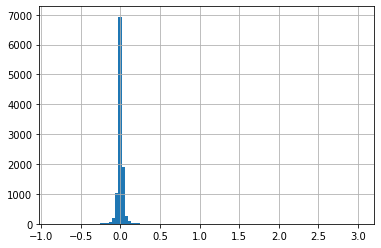

mean:  0.0005520138553554462
std:  0.061541585060177796
sharpe ratio:  -0.8587361877820942


In [95]:
# plot distribution, find me mean and std, sharpe ratio
df['return'].hist(bins=100)
plt.show()

print('mean: ', df['return'].mean())
print('std: ', df['return'].std())

risk_free = 0.0534

sharpe_ratio = (df['return'].mean() - risk_free) / df['return'].std()
print('sharpe ratio: ', sharpe_ratio)

In [96]:
from collections import Counter

def value_counts_array(arr):
    # Use Counter to count the occurrences of each unique value in the array
    counts = Counter(arr)
    
    # Convert the Counter object to a dictionary for a more user-friendly format
    counts_dict = dict(counts)
    
    return counts_dict


def ranking(array):
    arg_sort = array.argsort()
    ranks = [0] * len(array)
    start = 1
    init = 0
    curr = 0
    while curr < len(array):
        while curr + 1 < len(array) and array[arg_sort[curr]] == array[arg_sort[curr+1]]:
            ranks[arg_sort[curr]] = start
            curr += 1
        ranks[arg_sort[curr]] = start
        start += curr - init + 1
        curr += 1
        init = curr
    
    counts = value_counts_array(ranks)
    for i in range(len(array)):
        ranks[i] = (ranks[i] + ranks[i] + counts[ranks[i]] - 1) / 2 
    return ranks


In [97]:
# symmetric not assumed, exact binomial test? since no assumption of normality or symmetric? check if deviates from 0 # Math181B

# Non-para: no distribution assumed for population
# Sign test: comes from continuous rv,
# N<10: exact binomial test(this one is right)

# but can assume symmetric?
# use sign test, since it's a continuous rv, and we can assume symmetric
from scipy.stats import norm, binomtest
from scipy.stats import wilcoxon
lst = []

# but why signifiance test thou, still need sharpe ratio to determine if it's worth it?
for tick in df['ticker'].unique():
    n = len(df[df['ticker']==tick])
    null_mean = [0.01] * n
    null_mean = np.array(null_mean)

    # sign test
    # find the rank of each return, 1 corresponds to the smallest return
    # if there is a tie, the average of the ranks is assigned to each observation

    if n <= 12:
        #wilcoxon test
        statistic, prob = wilcoxon(df[df['ticker']==tick]['return'],null_mean, zero_method='zsplit', alternative='greater')
    else:
        # normal approximation
        z = (statistic - n*(n+1)/4) / np.sqrt(n*(n+1)*(2*n+1)/24)
        prob = 1 - norm.cdf(z)
    if prob < 0.1:
        lst.append(tick)

In [98]:
#因为策略是based on high volume, cant pick individual stocks, must pass all stocks, otherwise bias since you are not testing the behaviors but the stocks
len(lst)

10

In [99]:
for tick in lst:
    print(df[df['ticker']==tick])

    ticker    return
813   PAYX  0.019230
814   PAYX  0.010490
815   PAYX  0.015571
816   PAYX  0.111831
817   PAYX -0.001453
818   PAYX  0.054347
819   PAYX  0.007721
820   PAYX  0.020180
    ticker    return
992    HLX  0.000000
993    HLX  0.045714
994    HLX  0.023656
995    HLX  0.013285
996    HLX  0.032874
     ticker    return
2152     DD  0.003844
2153     DD  0.017783
2154     DD  0.004778
2155     DD  0.027221
2156     DD  0.075269
2157     DD  0.111112
2158     DD -0.002735
2159     DD  0.020429
     ticker    return
2577    CHX  0.008820
2578    CHX  0.102732
2579    CHX  0.059961
2580    CHX  0.104015
2581    CHX  0.013401
2582    CHX  0.068275
     ticker    return
3468   ULTA  0.022078
3469   ULTA  0.046336
3470   ULTA  0.013967
3471   ULTA  0.016615
     ticker    return
4086   SWBI  0.046022
4087   SWBI  0.036465
4088   SWBI  0.062846
4089   SWBI  0.038974
4090   SWBI -0.003455
     ticker    return
6600   LITE  0.140547
6601   LITE  0.012929
6602   LITE  0.031457
660